In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# loading the data from sklearn
data = pd.read_csv("drug200.csv")

In [77]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [79]:
data.shape

(200, 6)

In [80]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [81]:
data["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [82]:
data.groupby("Drug").mean()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_22512\1047574917.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Drug").mean()


,Age,Na_to_K
Drug,,
DrugY,43.747253,22.374780
drugA,35.869565,10.918783
drugB,62.500000,11.524375
drugC,42.500000,10.633750
drugX,44.018519,10.650556


In [83]:
X = data.drop(columns="Drug", axis = 1)

y = data["Drug"]

In [84]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [85]:
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [86]:
X = pd.get_dummies(X, columns = ["Sex","BP","Cholesterol"])
X

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0
196,16,12.006,0,1,0,1,0,1,0
197,52,9.894,0,1,0,0,1,1,0
198,23,14.020,0,1,0,0,1,0,1


In [87]:
y = pd.get_dummies(y, columns =["Drug"])
y

,DrugY,drugA,drugB,drugC,drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
195,0,0,0,1,0
196,0,0,0,1,0
197,0,0,0,0,1
198,0,0,0,0,1


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 15)

In [89]:
print(X.shape, X_train.shape, X_test.shape)

(200, 9) (160, 9) (40, 9)


In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [91]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [92]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (9,)),
                         keras.layers.Dense(10, activation = "relu"),
                         keras.layers.Dense(5, activation = "sigmoid")
                         ])

C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [93]:
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# Vizualization Accuracy and Loss

In [94]:
history1 = model.fit(X_train, y_train, validation_split = 0.1, epochs = 100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.0807 - loss: 9.6784 - val_accuracy: 0.0625 - val_loss: 9.6580
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0807 - loss: 8.6999 - val_accuracy: 0.0625 - val_loss: 8.7763
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0807 - loss: 7.7563 - val_accuracy: 0.0625 - val_loss: 7.9242
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0807 - loss: 6.8350 - val_accuracy: 0.0625 - val_loss: 7.1028
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0807 - loss: 5.9427 - val_accuracy: 0.0625 - val_loss: 6.3283
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0807 - loss: 5.1049 - val_accuracy: 0.0625 - val_loss: 5.6541
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0991 - loss: 4.3925 - val_accuracy: 0.1250 - val_loss: 5.1834
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1373 - loss: 3.9067 - val_accuracy: 0.1250 - val_loss: 4.8

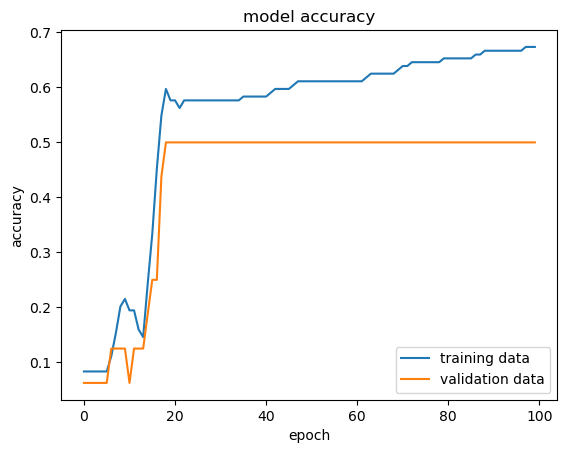

In [95]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')


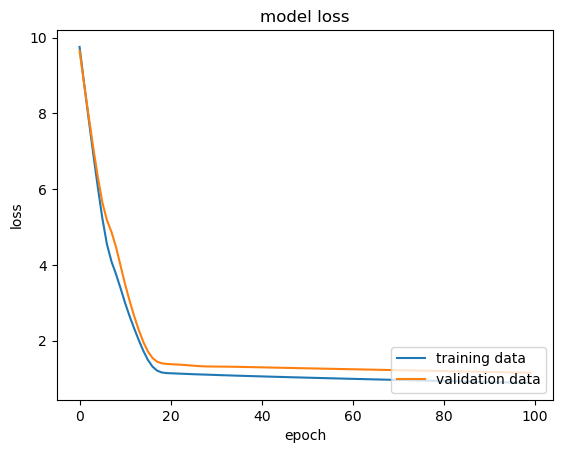

In [98]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

In [96]:
history_std = model.fit(X_train_std, y_train, validation_split = 0.1, 
                        epochs = 200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3805 - loss: 1.4482 - val_accuracy: 0.5000 - val_loss: 1.3329
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4229 - loss: 1.4075 - val_accuracy: 0.5000 - val_loss: 1.3043
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5056 - loss: 1.3612 - val_accuracy: 0.6250 - val_loss: 1.2753
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5486 - loss: 1.3164 - val_accuracy: 0.6875 - val_loss: 1.2488
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5592 - loss: 1.2753 - val_accuracy: 0.7500 - val_loss: 1.2256
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6001 - loss: 1.2382 - val_accuracy: 0.6250 - val_loss: 1.2035
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5870 - loss: 1.2057 - val_accuracy: 0.5625 - val_loss: 1.1823
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5817 - loss: 1.1762 - val_accuracy: 0.5625 - val_loss:

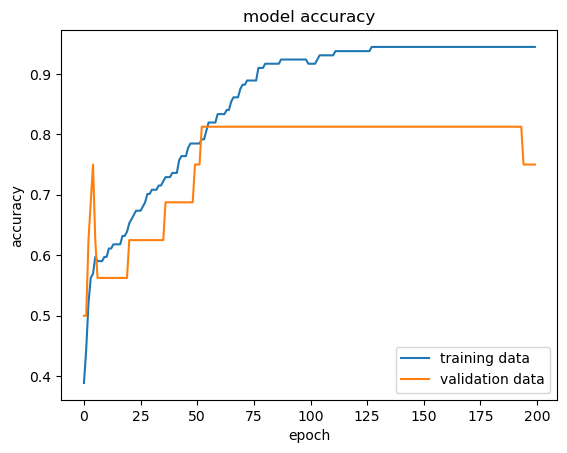

In [97]:
plt.plot(history_std.history['accuracy'])
plt.plot(history_std.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

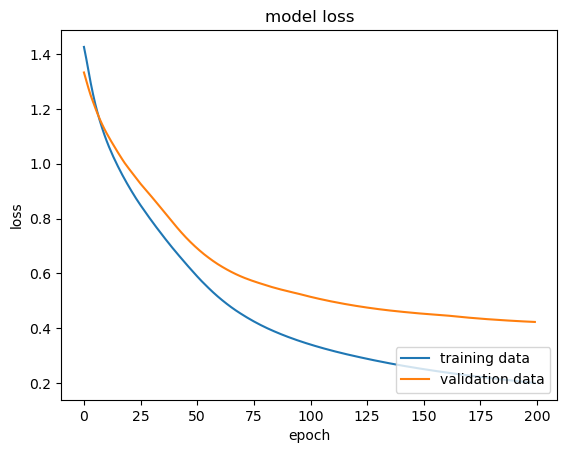

In [99]:
plt.plot(history_std.history['loss'])
plt.plot(history_std.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

In [74]:
model.fit(X_train, y_train, validation_split = 0.1, epochs = 400)

Epoch 1/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4589 - loss: 1.9799 - val_accuracy: 0.4375 - val_loss: 2.0328
Epoch 2/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5744 - loss: 1.2515 - val_accuracy: 0.4375 - val_loss: 1.2686
Epoch 3/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6797 - loss: 0.7858 - val_accuracy: 0.5000 - val_loss: 1.2245
Epoch 4/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6800 - loss: 0.7333 - val_accuracy: 0.5000 - val_loss: 1.2298
Epoch 5/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7487 - loss: 0.7160 - val_accuracy: 0.6250 - val_loss: 1.1247
Epoch 6/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7980 - loss: 0.6809 - val_accuracy: 0.6250 - val_loss: 1.0224
Epoch 7/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8079 - loss: 0.6764 - val_accuracy: 0.4375 - val_loss: 0.9628
Epoch 8/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7497 - loss: 0.6852 - val_accuracy: 0.5000 - val_loss: 

In [101]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print(accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9021 - loss: 0.2502 
0.8999999761581421


In [103]:
y_pred = model.predict(X_test_std)
print(y_pred[0])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[0.73576385 0.01246033 0.03068152 0.5836853  0.14827837]


In [106]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[0, 1, 3, 0, 4, 0, 4, 4, 1, 0, 0, 4, 1, 4, 4, 0, 0, 0, 0, 0, 4, 1, 0, 4, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 4, 3, 4, 4, 0, 4]
